In [1]:
import sys
sys.path.insert(0, '..')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 1

# Empty attack on Adaline

In [2]:
import pickle

with open('../../datasets/processed/trec2007-1607061515-features.dat', 'rb') as infile:
    X = pickle.load(infile)

with open('../../datasets/processed/trec2007-1607061515-labels.dat', 'rb') as infile:
    Y = pickle.load(infile)

print('X is a %s \t %s' % (X.shape, type(X)))
print('Y is a %s \t %s' % (Y.shape, type(Y)))

X is a (75419, 10000) 	 <class 'numpy.ndarray'>
Y is a (75419, 1) 	 <class 'numpy.matrixlib.defmatrix.matrix'>


## prepare the dataset

In [5]:
## reduce dataset to go faster during prototyping
N_keep = 20000
x = X[:N_keep]
y = Y[:N_keep]

## the attack

In [7]:
%aimport hamattack
x, y = hamattack.apply_ham_attack(features=x, labels=y, percentage_poisoned=0.1)

print(x.shape)
print(y.shape)

(22000, 10000)
(22000, 1)


## training

In [8]:
add_bias = lambda x: np.insert(x, 0, values=1, axis=1) # add bias term
convert_labels = lambda y: y*2 - 1                     # Convert labels to 1 and -1

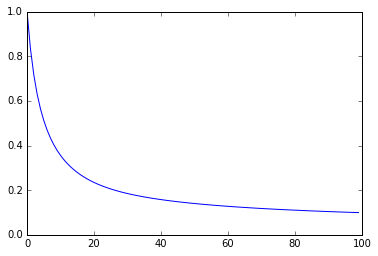

 cost at iteration 200: 0.099


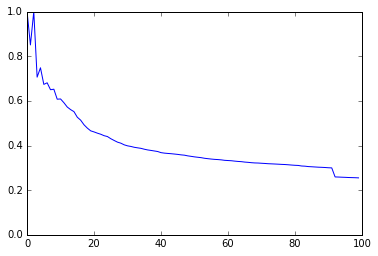

error at iteration 200: 0.255


In [9]:
%aimport adaline
from adaline import max_iters

x = add_bias(x)
y = convert_labels(y)

weights, cost, error = adaline.train_adaline(features=x, labels=y,
                                             rate=0.061,
                                             termination_condition=max_iters(100),
                                             verbose=False)

plt.plot(cost)
plt.ylim(0, cost[0])
plt.show()
print(' cost at iteration 200: %.3f' % cost[-1])

plt.plot(error)
plt.ylim(0, error[0])
plt.show()
print('error at iteration 200: %.3f' % error[-1])

## testing

In [10]:
%aimport adaline

x_test = X[N_keep:N_keep+1000]
y_test = Y[N_keep:N_keep+1000]

x_test = add_bias(x_test)
y_test = convert_labels(y_test)

labels, cost = adaline.test_adaline(weights=weights, features=x_test)

In [11]:
## error
np.sum(y_test != labels)/x_test.shape[0] # mean error over samples

0.36499999999999999